<a href="https://colab.research.google.com/github/silviolima07/residencia_tec_puc_ml/blob/main/pratica01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=19aqrGAvsnWwR_CzLkaJBoWFJfjmTKmcA)

### Práticas a serem desenvolvidas:
-1)Criação de um dataset sintético para avaliação da tarefa de classificação;

-2) Divisão de dados em treinamento e teste;

-3) Criação e aplicação de um modelo de Machine Learning;

-4) Verificação da eficiência do modelo na tarefa de classificação através da
acurácia.

In [1]:
import pandas as pd

In [2]:
 # Importando o modulo para criarmos datasets sinteticos
from sklearn.datasets import make_classification

In [3]:
# Importando bibliotecas de plotagem e ajustes de tamanho de figuras
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [4]:
# Importando a função de divisão dos dados em treinamento e teste
from sklearn.model_selection import train_test_split
# Importando o modelo do Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Importando a métrica de avaliação do modelo
from sklearn.metrics import accuracy_score

In [5]:
params = {'legend.fontsize': 20,
 'figure.figsize': (15,5),
 'axes.labelsize': 20,
 'axes.titlesize': 20,
 'xtick.labelsize': 20,
 'ytick.labelsize': 20}

In [6]:
def make_cls(n_samples, n_features,n_informative, n_redundant, n_classes, random_state):
  # Gera dados aleatórios
  X, y = make_classification(n_samples = n_samples, n_features = n_features,
   n_informative = n_informative, n_redundant = n_redundant,
   n_classes = n_classes, random_state = random_state)
  return (X,y)


### Passo 1 - Criação de um dataset genérico

In [7]:
# Gera dados aleatórios
# X, y = make_classification(n_samples = 1000, n_features = 5,
#  n_informative = 3, n_redundant = 1,
#  n_classes = 3, random_state = 42)
n_samples = 1000
n_features = 5
n_informative = 3
n_redundant = 1
n_classes = 3
random_state = 42

X, y = make_cls(n_samples = n_samples,
                n_features = n_features,
                n_informative = n_informative,
                n_redundant = n_redundant,
                n_classes = n_classes,
                random_state = random_state)

In [8]:
#print("Valores das variaveis\nn_samples:", n_samples, "\nn_features:", n_features, "\nn_informative:", n_informative,"\nn_redundant:", n_redundant,
#      "\nn_classes:", n_classes, "\nrandom_state:", random_state)

In [9]:
print("Dataset\nLinhas:",X.shape[0],"\nColunas:", X.shape[1])

Dataset
Linhas: 1000 
Colunas: 5


In [10]:
print(X[:5,:])

[[-2.52469981  0.44395622  1.52290093 -0.74224801  2.6846391 ]
 [ 2.00753252 -1.46309596 -0.88517443  1.17754472 -0.20972932]
 [ 1.32100607 -2.4018553  -1.42626134  1.29163523 -1.24303485]
 [-1.19770619 -0.76353166  0.47551907 -1.10995284  1.44762553]
 [ 1.36709886 -0.06586396 -0.38047272 -0.67419056 -0.34760868]]


In [11]:
print(y[:10])

[1 2 2 1 2 1 2 0 2 0]


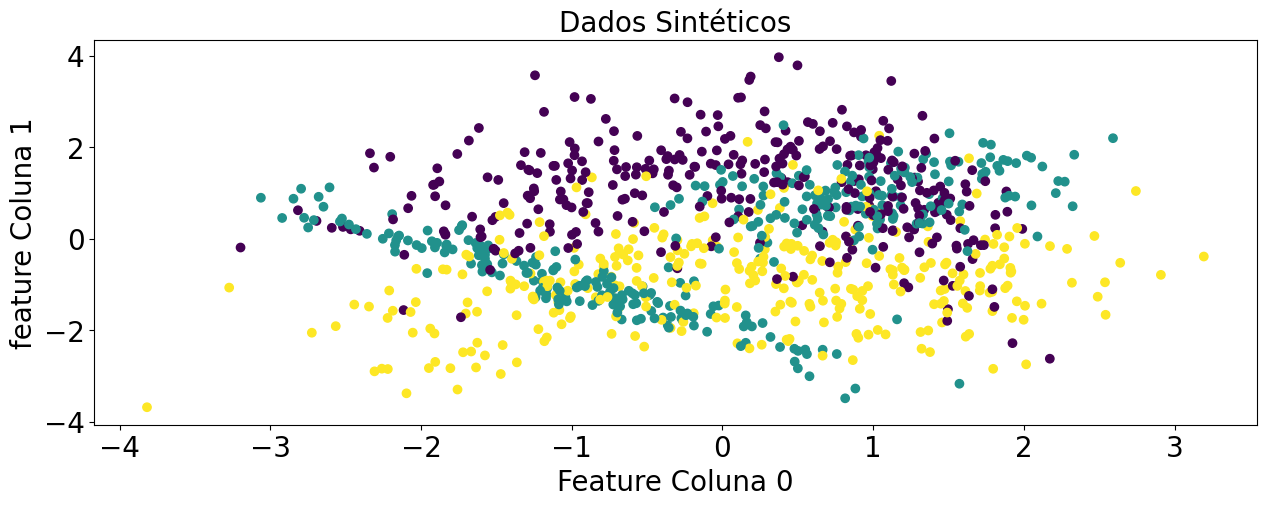

In [12]:
# Visualizando os dados graficamente
pylab.rcParams.update(params)
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c = y)
ax.set_xlabel('Feature Coluna 0')
ax.set_ylabel('feature Coluna 1')
ax.set_title('Dados Sintéticos')
plt.show()

### Passo 2 - Divisão dos dados em Dados de Treinamento e Dados de Teste

In [13]:
# Divisao dos dados em treinamento e teste
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = test_size, random_state = random_state)

In [14]:
print("As dimensões de X_train:", X_train.shape)
print("As dimensões de y_train:", y_train.shape)

As dimensões de X_train: (800, 5)
As dimensões de y_train: (800,)


In [15]:
print("As dimensões de X_test:", X_test.shape)
print("As dimensões de y_test:", y_test.shape)

As dimensões de X_test: (200, 5)
As dimensões de y_test: (200,)


### Passo 3 - Criação e aplicação de um modelo de Machine Learning

In [16]:
# Criando o modelo do Decision Tree
clf_dt = DecisionTreeClassifier(random_state = random_state)

In [17]:
# Treinamento
clf_dt.fit(X_train,y_train);

In [18]:
# Teste
y_pred = clf_dt.predict(X_test)

In [19]:
print(y_pred.shape)

(200,)


In [20]:
# Avaliando o modelo
acc_dt = accuracy_score(y_test,y_pred)
acc_dt = round(acc_dt,2)*100
print("\nResultado da classificação:", acc_dt)


Resultado da classificação: 87.0


In [21]:
print("Valores das variaveis\nn_samples:", n_samples, "\nn_features:", n_features, "\nn_informative:", n_informative,"\nn_redundant:", n_redundant,
      "\nn_classes:", n_classes, "\nrandom_state:", random_state, '\ntest_size:', test_size,'\nacc_dt:', acc_dt)

Valores das variaveis
n_samples: 1000 
n_features: 5 
n_informative: 3 
n_redundant: 1 
n_classes: 3 
random_state: 42 
test_size: 0.2 
acc_dt: 87.0


In [22]:
data = {'n_samples': n_samples,
        'n_features': n_features,
        'n_informative': n_informative,
        'n_redundant': n_redundant,
        'n_classes': n_classes,
        'random_state': random_state,
        'test_size': test_size,
        'acc_dt': acc_dt}

df_orig = pd.DataFrame([data])
df_orig

,n_samples,n_features,n_informative,n_redundant,n_classes,random_state,test_size,acc_dt
0,1000,5,3,1,3,42,0.2,87.0


### Exercicios

### Questão 1) Reproduza os processos indicados no exemplo anterior alterando os seguintes parâmetros na função make_classification :

n_samples : 2000


n_features : 10


n_informative : 3

n_redundant : 2

n_classes : 3

random_state : 42

### Alterando valores das variáveis iniciais.

In [23]:
n_samples  = 2000

n_features = 10

n_informative = 3

n_redundant = 2

n_classes = 3

random_state = 42

In [24]:
#print("Valores das variaveis\nn_samples:", n_samples, "\nn_features:", n_features, "\nn_informative:", n_informative,"\nn_redundant:", n_redundant,
#      "\nn_classes:", n_classes, "\nrandom_state:", random_state)

In [25]:
X, y = make_cls(n_samples = n_samples,n_features  = n_features , n_informative = n_informative, n_redundant = n_redundant, n_classes = n_classes, random_state = random_state)

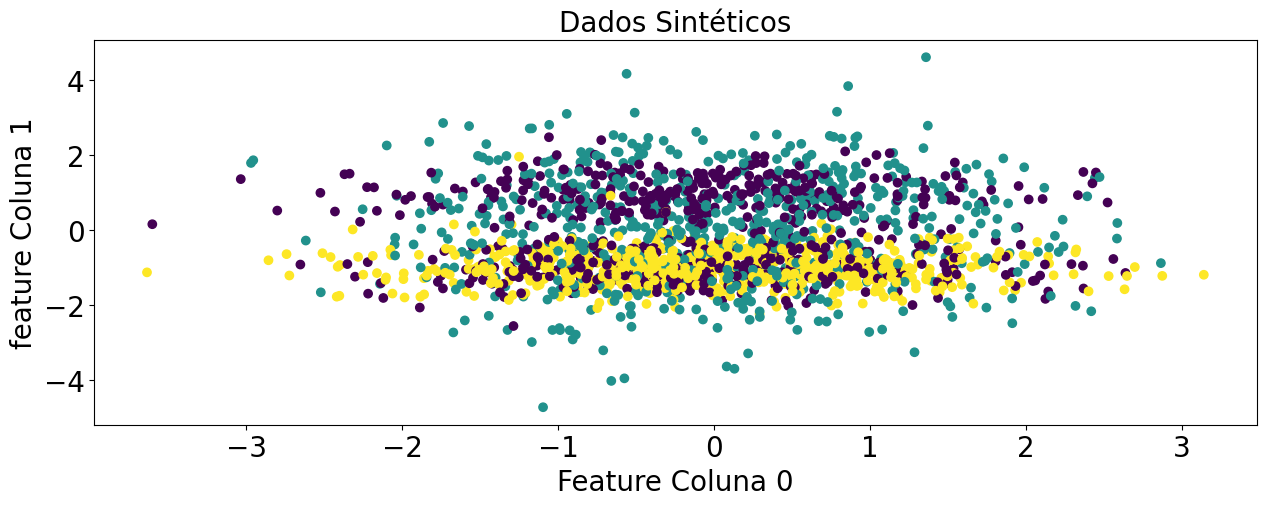

In [26]:
# Visualizando os dados graficamente
pylab.rcParams.update(params)
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c = y)
ax.set_xlabel('Feature Coluna 0')
ax.set_ylabel('feature Coluna 1')
ax.set_title('Dados Sintéticos')
plt.show()

In [27]:
# Divisao dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = test_size, random_state = random_state)

In [28]:
print("As dimensões de X_train", "\nLinhas:",X_train.shape[0],"\tColunas:", X_train.shape[1])
print("\nAs dimensões de y_train", "\nLinhas:",y_train.shape[0])

As dimensões de X_train 
Linhas: 1600 	Colunas: 10

As dimensões de y_train 
Linhas: 1600


In [29]:
print("As dimensões de X_test","\nLinhas:",X_test.shape[0],"\tColunas:", X_test.shape[1])
print("\nAs dimensões de y_test","\nLinhas:", y_test.shape[0])

As dimensões de X_test 
Linhas: 400 	Colunas: 10

As dimensões de y_test 
Linhas: 400


In [30]:
# Criando o modelo do Decision Tree
clf_dt = DecisionTreeClassifier(random_state = random_state)

In [31]:
# Treinamento
clf_dt.fit(X_train,y_train);

In [32]:
# Teste
y_pred = clf_dt.predict(X_test)

In [33]:
print(y_pred.shape)

(400,)


In [34]:
# Avaliando o modelo
acc_dt = accuracy_score(y_test,y_pred)
acc_dt = round(acc_dt,2)*100
print("Resultado da classificação:", acc_dt)

Resultado da classificação: 82.0


In [35]:
print("Valores das variaveis\nn_samples:", n_samples, "\nn_features:", n_features, "\nn_informative:", n_informative,"\nn_redundant:", n_redundant,
      "\nn_classes:", n_classes, "\nrandom_state:", random_state, '\ntest_size:', test_size,'\nacc_dt:', acc_dt)

Valores das variaveis
n_samples: 2000 
n_features: 10 
n_informative: 3 
n_redundant: 2 
n_classes: 3 
random_state: 42 
test_size: 0.2 
acc_dt: 82.0


In [36]:
data = {'n_samples': n_samples,
        'n_features': n_features,
        'n_informative': n_informative,
        'n_redundant': n_redundant,
        'n_classes': n_classes,
        'random_state': random_state,
        'test_size': test_size,
        'acc_dt': acc_dt}

df_q1 = pd.DataFrame([data])
df_q1

,n_samples,n_features,n_informative,n_redundant,n_classes,random_state,test_size,acc_dt
0,2000,10,3,2,3,42,0.2,82.0


### Questão 2)  Faça as seguintes alterações e verifique os resultados:
### - Nas funções make_classification , train_test_split e
### DecisionTreeClassifier mude o random_state para 0
### - Mude a proporção da divisão dos dados de treinamento e teste para 70%  e 30%, respectivamente.

### Parâmetro random_state igual a  0

In [37]:
# Alterando random_state para 0
random_state = 0


In [38]:
print("Valores das variaveis\nn_samples:", n_samples, "\nn_features:", n_features, "\nn_informative:", n_informative,"\nn_redundant:", n_redundant,
      "\nn_classes:", n_classes, "\nrandom_state:", random_state)

Valores das variaveis
n_samples: 2000 
n_features: 10 
n_informative: 3 
n_redundant: 2 
n_classes: 3 
random_state: 0


In [39]:
X, y = make_cls(n_samples = n_samples,n_features  = n_features , n_informative = n_informative, n_redundant = n_redundant, n_classes = n_classes, random_state = random_state)

### Parâmetro test_size igual a 0.3.
### Divisão dos dados de treinamento e teste para 70% e 30% respectivamente.
### Isso é feito definindo o valor de test_size igual a 0.3, assim 70% dos dados vão para treinamento e 30% para testes.

In [40]:
test_size = 0.3
print("Valor da variavel\n",
"test_size:", test_size)

Valor da variavel
 test_size: 0.3


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = test_size, random_state = random_state)

In [42]:
print("As dimensões de X_train", "\nLinhas:",X_train.shape[0],"\tColunas:", X_train.shape[1])
print("\nAs dimensões de y_train", "\nLinhas:",y_train.shape[0])

print("\n\nAs dimensões de X_test","\nLinhas:",X_test.shape[0],"\tColunas:", X_test.shape[1])
print("\nAs dimensões de y_test","\nLinhas:", y_test.shape[0])

As dimensões de X_train 
Linhas: 1400 	Colunas: 10

As dimensões de y_train 
Linhas: 1400


As dimensões de X_test 
Linhas: 600 	Colunas: 10

As dimensões de y_test 
Linhas: 600


In [43]:
clf_dt = DecisionTreeClassifier(random_state = random_state)

In [44]:
# Treinamento
clf_dt.fit(X_train,y_train);

In [45]:
# Teste
y_pred = clf_dt.predict(X_test)

In [46]:
# Avaliando o modelo
acc_dt = accuracy_score(y_test,y_pred)
acc_dt = round(acc_dt,2)*100
print("Resultado da classificação:", acc_dt)

Resultado da classificação: 79.0


In [47]:
print("Valores das variaveis\nn_samples:", n_samples, "\nn_features:", n_features, "\nn_informative:", n_informative,"\nn_redundant:", n_redundant,
      "\nn_classes:", n_classes, "\nrandom_state:", random_state, '\ntest_size:', test_size,'\nacc_dt:', acc_dt)

Valores das variaveis
n_samples: 2000 
n_features: 10 
n_informative: 3 
n_redundant: 2 
n_classes: 3 
random_state: 0 
test_size: 0.3 
acc_dt: 79.0


In [48]:
data = {'n_samples': n_samples,
        'n_features': n_features,
        'n_informative': n_informative,
        'n_redundant': n_redundant,
        'n_classes': n_classes,
        'random_state': random_state,
        'test_size': test_size,
        'acc_dt': acc_dt}

df_q2_30 = pd.DataFrame([data])
df_q2_30

,n_samples,n_features,n_informative,n_redundant,n_classes,random_state,test_size,acc_dt
0,2000,10,3,2,3,0,0.3,79.0


### Datasets gerados em cada experimento

In [49]:
df_orig

,n_samples,n_features,n_informative,n_redundant,n_classes,random_state,test_size,acc_dt
0,1000,5,3,1,3,42,0.2,87.0


In [50]:
df_q1

,n_samples,n_features,n_informative,n_redundant,n_classes,random_state,test_size,acc_dt
0,2000,10,3,2,3,42,0.2,82.0


In [51]:
df_q2_30

,n_samples,n_features,n_informative,n_redundant,n_classes,random_state,test_size,acc_dt
0,2000,10,3,2,3,0,0.3,79.0


In [52]:

temp1 = pd.concat([df_orig, df_q1, df_q2_30])
# temp1 = pd.concat([temp1, df_2])
df = temp1
status = ['Original', 'Alterados valores iniciais','Alterados random_state e test_size']
df['Situacao'] = status
df = df[['Situacao','n_samples', 'n_features', 'n_informative', 'n_redundant', 'n_classes',
        'random_state', 'test_size', 'acc_dt']]
df

,Situacao,n_samples,n_features,n_informative,n_redundant,n_classes,random_state,test_size,acc_dt
0,Original,1000,5,3,1,3,42,0.2,87.0
0,Alterados valores iniciais,2000,10,3,2,3,42,0.2,82.0
0,Alterados random_state e test_size,2000,10,3,2,3,0,0.3,79.0


## Variáveis:
### A variável n_samples indica o total de linhas que serão criadas no dataset gerado.
### A variável n_features corresponde ao total de colunas geradas.
### A variável n_informative indica o total de colunas relevantes no conjunto de dados.
### A variável n_redundant indica a quantidade colunas usadas para aumentar a complexidade do estudo, são colunas sem importância no modelo.
### A variável n_classes indica o total de classes correspondentes aos dados gerados.
### A variável random_state é definida para controlar a geração de dados aleatórios, fixando um valor, sempre serão criados os mesmos valores aleat´rios, garantindo assim a repetibilidade da experiência.
### A variável test_size, define como serão divididos os dados que serão usados para treino e teste do modelo treinado.

## Experimentos:
### Na primeira situação o conjunto de dados aleatórios criado teve o valor 42 definido para a variável random_state e test_size de 20%,obtendo uma acurácia do modelo de classificação no valor de 87%.
### Na segunda situação, os valores de n_samples, n_features, n_redundant foram alterados e a acurácia obtida foi de 82%.
### Na terceira situação, foi definido um novo valor de 0 para o random_state e test_size de 0.3. Com isso o conjunto de dados de treinamento receberá 70%  e o conjunto de testes os 30% restantes.A acurácia foi de 79%.





## Observações e Conclusões:
- Aumentando o conjunto de dados diminuiu a acurácia do modelo treinado.
- Isto se deve a maior quantidade de possibidades encontradas num conjunto maior de dados, antes eram 1000 e foi alterado para 2000, também devido ao aumento da quantidade de colunas redundantes no conjunto de dados, o que impacta no treinamento e avaliação do modelo.
- O parãmetro test_size influência bastante na performance do modelo, pois ao dividir o conjunto de dados em treino e teste, o ideal é que o modelo tenha dados em número suficiente para que ele capture os padrões existentes no conjunto de treinamento e assim possa realizar previsões mais próximas da realidade.
- Se valor de test_size é muito baixo, por exemplo 0.1 ou 10%, isso significa que o conjunto de dados irá separar para treinamento 90% dos dadas no conjunto utilizado. Se o valor de test_size for muito alto, o conjunto usado no treinamento pode ser muito pequeno e prejudicar o aprendizaado do algoritmo, impactando diretamente na performance do modelo.
- O valor de test_size normalmente indicado é 0.2 ou 0.3. Dessa forma o conjunto de dados usado para treinamento terá uma performance aceitável.
- Com test_size de 0.3, o modelo foi treinado com 1400 linhas e testado com 600.
- Apesar da performance ter diminuido em relação a primeira e segunda situação,  devido a mudanças nos parâmetros, a acurácia de 79% se mostra aceitável, claro que isso vai depender do tipo de negócio envolvido.
- Aumentando o valor do test_size para 0.3, antes era 0.2 originalmente, o treinamento do modelo teve mais dados a disposição e pode identificar mais padrões entre os dados usados, se tornando mais generalista e sua performance apesar de menor, 79%, antes era acima de 80%, é aceitável, dependendo do contexto onde o modelo será aplicado.
- Percentuais muito altos de acurácia podem indicar overfitting, onde o modelo se torna especializado. Valores muito baixos, pode indicar necessidade de mais dados para treinamento. Enfim tudo depende da quantidade de dados, contexto e parâmetros usados.